<a href="https://colab.research.google.com/github/Ibnuamrithaher/unstructured_data/blob/main/11%20-%20Image%20Data/Part%202%20-%20Image%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.3-py2.py3-none-any.whl size=41032443 sha256=7c1c54527dbe90e38631263e74a8eb218f0c8c73d8132af2ee099e6e54128181
  Stored in directory: /root/.cache/pip/wheels/25/9b/68/61b665f8682276ffbc7fa54bae3ccc541be2ed103979770b9b
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=c0c0d70993970221a5aeff7e34cd83756b4500a3c8199de5d2e6ef26e6acd2ac
  Stored in directory: /root/.cache/pip/wheels/77/a7/60/c75983f4da5b630422325c5048591b6ee9e2ce123bf2b7b357
Successfully built luwiji jcopml


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease


In [3]:
url = "https://raw.githubusercontent.com/Ibnuamrithaher/unstructured_data/refs/heads/main/11%20-%20Image%20Data/Data/small_mnist.csv"
df = pd.read_csv(url)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.iloc[1:].values.max()

255

## **Dataset Splitting**

In [5]:
X = df.drop(columns="label").values / 255
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1600, 784), (400, 784), (1600,), (400,))

In [8]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

## **Visualize Random Data**

In [9]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

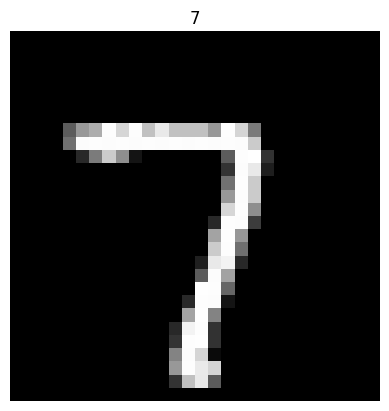

In [13]:
N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(label)
plt.axis('off')

## **Training**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp


In [17]:
pipeline = Pipeline([
    ("algo", RandomForestClassifier(n_jobs=-1,random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.999375 0.9025057795953932 0.9275


## **Visualize Prediction**

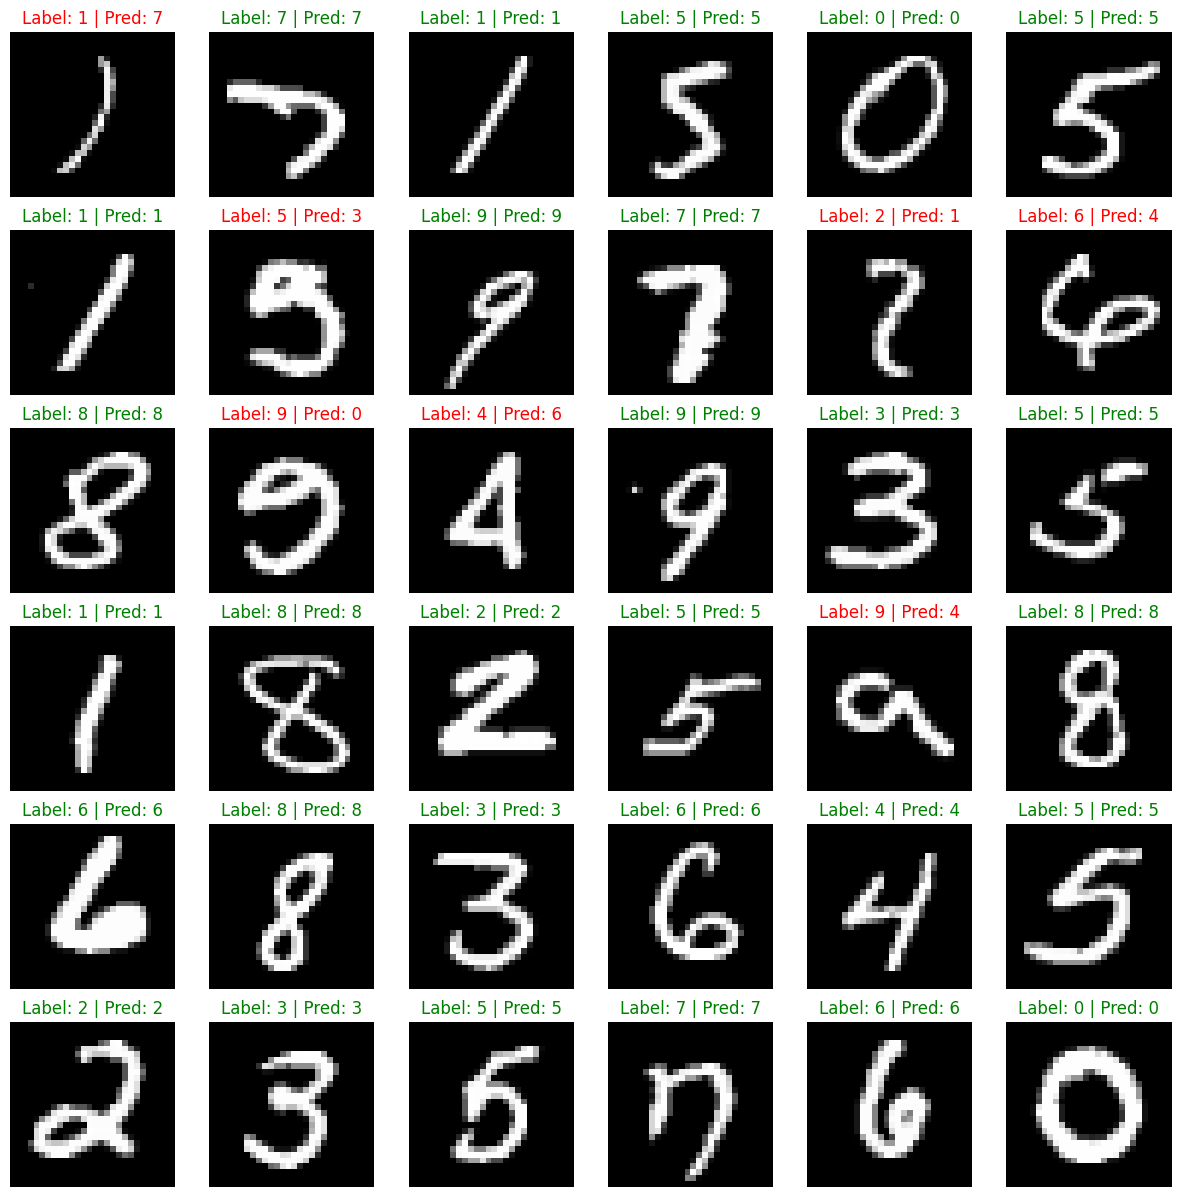

In [20]:
idx = np.random.choice(len(X_test),size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6,6, figsize=(15,15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
  font = {"color":"g"} if label == pred else {"color" : "r"}

  ax.imshow(img.reshape(28,28),cmap='gray')
  ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font)
  ax.axis('off')

## **Why it works**

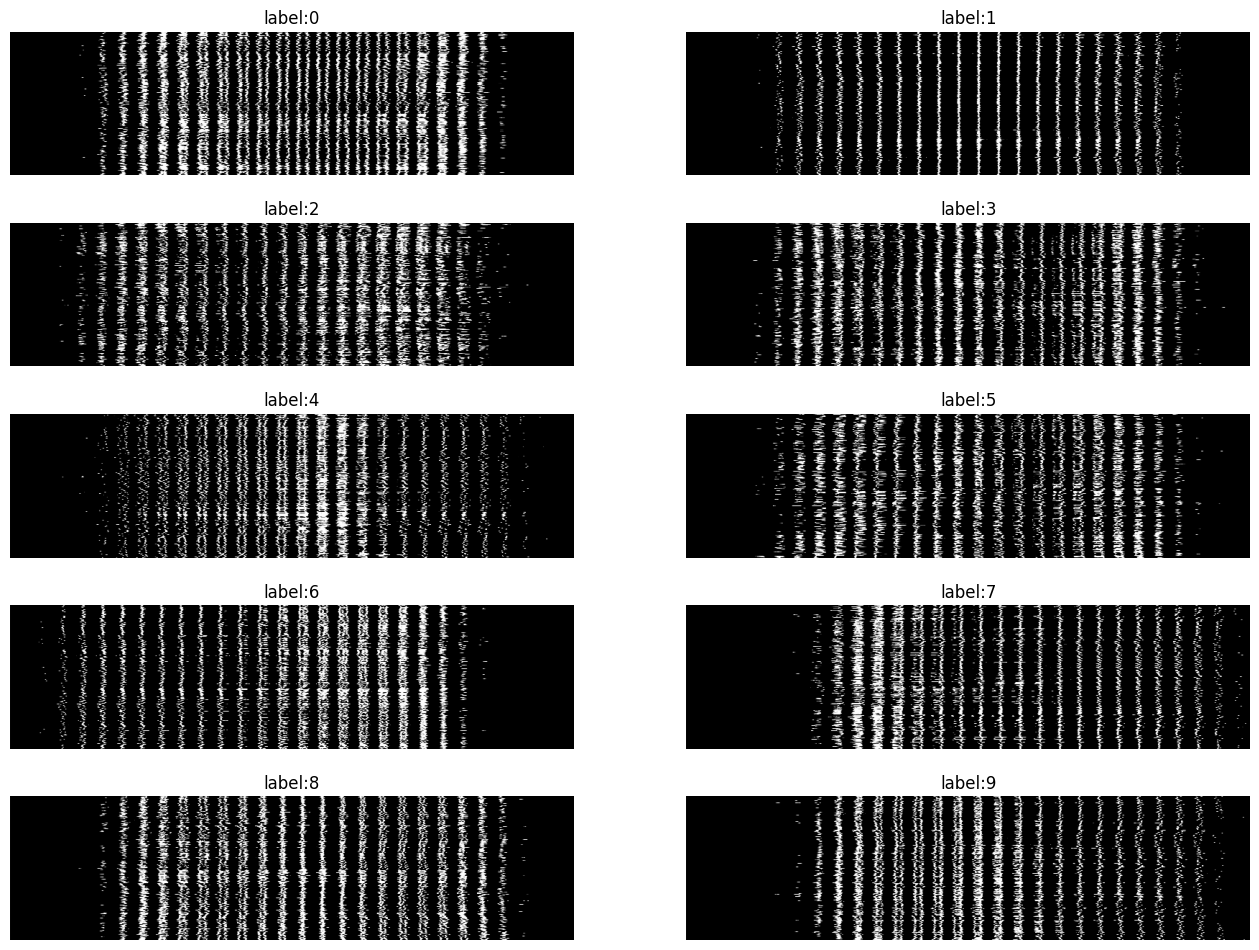

In [21]:
fig, axes = plt.subplots(5,2, figsize=(16,12))

for idx, ax in enumerate(axes.flatten()):
  ax.imshow(df.iloc[idx*200:(idx+1)*200],cmap='gray')
  ax.set_title(f"label:{idx}")
  ax.axis("off")